# Machine Learning Engineer Nanodegree
## Capstone Project
### Etienne Boshoff
### 16th July 2017
-----------------------------------------------------------------------------------------------------------------------

In [1]:
import sys

#Disply the current Python and Anaconda version:
print(sys.version)

2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]


# Reading the dataset

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

#Load the cancer diagnosis dataset
try:
    full_data = pd.read_csv('data.csv')
    print("Dataset has {} samples with {} features each.".format(*full_data.shape))
    display(full_data.head(n = 5))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Dataset has 569 samples with 32 features each.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Analysis

## Basic Statistics

In [3]:
display(full_data.describe())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Feature Data Types

In [4]:
feature_list = full_data.columns.values.tolist()

#Display the data type for all features that has a data type different from float64: 
for f in feature_list:
    if full_data[f].dtype != "float64":
        print(f, ': ', full_data[f].dtype)
print('The data type of all remaning features is float64')

('id', ': ', dtype('int64'))
('diagnosis', ': ', dtype('O'))
The data type of all remaning features is float64


## Label encoding

In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["M", "B"])
full_data['diagnosis'] = le.transform(full_data['diagnosis'])

display(full_data.head(n = 5))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Removing the sample identifier feature 

In [6]:
#Remove id
full_data = full_data.drop('id', axis = 1).copy()

display(full_data.head(n = 5))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Outlier Detection

In [7]:
# For each feature find the data points with extreme high or low values
for feature in full_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(full_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(full_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*3
    
    # Display the outliers
    print("Data points considered extreme outliers for the feature '{}':".format(feature))
    display(full_data[~((full_data[feature] >= Q1 - step) & (full_data[feature] <= Q3 + step))])

Data points considered extreme outliers for the feature 'diagnosis':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Data points considered extreme outliers for the feature 'radius_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,1,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525


Data points considered extreme outliers for the feature 'texture_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
239,1,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,0.1809,...,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496


Data points considered extreme outliers for the feature 'perimeter_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Data points considered extreme outliers for the feature 'area_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,1,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
180,1,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,1,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,1,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,1,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


Data points considered extreme outliers for the feature 'smoothness_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
504,0,9.268,12.87,61.49,248.7,0.1634,0.2239,0.0973,0.05252,0.2378,...,10.28,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.1025,0.3038,0.1252


Data points considered extreme outliers for the feature 'compactness_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,1,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,...,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.544,0.09964


Data points considered extreme outliers for the feature 'concavity_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Data points considered extreme outliers for the feature 'concave points_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Data points considered extreme outliers for the feature 'symmetry_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
25,1,17.14,16.4,116.0,912.7,0.1186,0.2276,0.2229,0.1401,0.304,...,22.25,21.4,152.4,1461.0,0.1545,0.3949,0.3853,0.255,0.4066,0.1059


Data points considered extreme outliers for the feature 'fractal_dimension_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,1,11.420,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
152,0,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259
504,0,9.268,12.87,61.49,248.7,0.1634,0.2239,0.0973,0.05252,0.2378,...,10.28,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.1025,0.3038,0.1252
505,0,9.676,13.14,64.12,272.5,0.1255,0.2204,0.1188,0.07038,0.2057,...,10.60,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.1075,0.2848,0.1364


Data points considered extreme outliers for the feature 'radius_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
122,1,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
138,1,14.95,17.57,96.85,678.1,0.11670,0.1305,0.1539,0.08624,0.1957,...,18.55,21.43,121.4,971.4,0.1411,0.2164,0.3355,0.1667,0.3414,0.07147
212,1,28.11,18.47,188.50,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
258,1,15.66,23.20,110.20,773.5,0.11090,0.3114,0.3176,0.13770,0.2495,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
417,1,15.50,21.08,102.90,803.1,0.11200,0.1571,0.1522,0.08481,0.2085,...,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480
461,1,27.42,26.27,186.90,2501.0,0.10840,0.1988,0.3635,0.16890,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,1,23.09,19.83,152.10,1682.0,0.09342,0.1275,0.1676,0.10030,0.1505,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


Data points considered extreme outliers for the feature 'texture_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,1,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.2065,0.1118,0.2397,...,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.3639,0.1767,0.3176,0.10230
192,0,9.72,18.22,60.73,288.1,0.06950,0.02344,0.0000,0.0000,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.0000,0.1909,0.06559
473,0,12.27,29.97,77.42,465.4,0.07699,0.03398,0.0000,0.0000,0.1701,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.0000,0.2409,0.06743
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.0000,0.0000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905


Data points considered extreme outliers for the feature 'perimeter_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,1,19.17,24.80,132.4,1123.0,0.09740,0.2458,0.2065,0.11180,0.2397,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
42,1,19.07,24.81,128.3,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,...,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380
78,1,20.18,23.97,143.7,1245.0,0.12860,0.3454,0.3754,0.16040,0.2906,...,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
108,1,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,1,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
212,1,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
258,1,15.66,23.20,110.2,773.5,0.11090,0.3114,0.3176,0.13770,0.2495,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
272,1,21.75,20.99,147.3,1491.0,0.09401,0.1961,0.2195,0.10880,0.1721,...,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858
417,1,15.50,21.08,102.9,803.1,0.11200,0.1571,0.1522,0.08481,0.2085,...,23.17,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480
461,1,27.42,26.27,186.9,2501.0,0.10840,0.1988,0.3635,0.16890,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


Data points considered extreme outliers for the feature 'area_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
77,1,18.05,16.15,120.2,1006.0,0.10650,0.21460,0.1684,0.10800,0.2152,...,22.39,18.91,150.1,1610.0,0.1478,0.5634,0.3786,0.2102,0.3751,0.11080
108,1,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,1,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,1,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,1,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,1,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
250,1,20.94,23.56,138.9,1364.0,0.10070,0.16060,0.2712,0.13100,0.2205,...,25.58,27.00,165.3,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849
258,1,15.66,23.20,110.2,773.5,0.11090,0.31140,0.3176,0.13770,0.2495,...,19.85,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
265,1,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218


Data points considered extreme outliers for the feature 'smoothness_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
71,0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840
116,0,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,...,9.414,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722
122,1,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
213,1,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.070,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818
314,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
345,0,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.880,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488
505,0,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,...,10.600,18.04,69.47,328.1,0.2006,0.36630,0.29130,0.10750,0.2848,0.13640


Data points considered extreme outliers for the feature 'compactness_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
42,1,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,...,24.090,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
71,0,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
122,1,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,...,26.020,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
152,0,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
190,1,14.220,23.12,94.37,609.9,0.10750,0.2413,0.19810,0.06618,0.2384,...,15.740,37.18,106.40,762.4,0.15330,0.9327,0.8488,0.17720,0.5166,0.14460
290,0,14.410,19.73,96.03,651.0,0.08757,0.1676,0.13620,0.06602,0.1714,...,15.770,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799


Data points considered extreme outliers for the feature 'concavity_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750
112,0,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,...,15.30,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820
122,1,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009
152,0,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590
213,1,17.420,25.56,114.50,948.0,0.10060,0.1146,0.1682,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.1099,0.1603,0.06818
376,0,10.570,20.22,70.15,338.3,0.09073,0.1660,0.2280,0.05941,0.2188,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.1465,0.2597,0.12000


Data points considered extreme outliers for the feature 'concave points_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,1,19.170,24.80,132.40,1123.0,0.0974,0.2458,0.2065,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
152,0,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.12590
213,1,17.420,25.56,114.50,948.0,0.1006,0.1146,0.1682,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818


Data points considered extreme outliers for the feature 'symmetry_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.2575,0.6638,0.17300
42,1,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,...,24.090,33.17,177.40,1651.0,0.1247,0.74440,0.7242,0.2493,0.4670,0.10380
78,1,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,...,23.370,31.72,170.30,1623.0,0.1639,0.61640,0.7681,0.2508,0.5440,0.09964
119,1,17.950,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,...,20.580,27.83,129.20,1261.0,0.1072,0.12020,0.2249,0.1185,0.4882,0.06111
138,1,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,...,18.550,21.43,121.40,971.4,0.1411,0.21640,0.3355,0.1667,0.3414,0.07147
146,1,11.800,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,...,13.740,26.38,91.93,591.7,0.1385,0.40920,0.4504,0.1865,0.5774,0.10300
190,1,14.220,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,...,15.740,37.18,106.40,762.4,0.1533,0.93270,0.8488,0.1772,0.5166,0.14460
314,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.0000,0.3142,0.08116
351,1,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,...,17.360,24.17,119.40,915.3,0.1550,0.50460,0.6872,0.2135,0.4245,0.10500


Data points considered extreme outliers for the feature 'fractal_dimension_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,1,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,...,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
71,0,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
112,0,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,...,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
151,0,8.219,20.70,53.27,203.9,0.09405,0.1305,0.13210,0.02168,0.2222,...,9.092,29.72,58.08,249.8,0.16300,0.4310,0.5381,0.07879,0.3322,0.14860
152,0,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,0,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.1669,...,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620
190,1,14.220,23.12,94.37,609.9,0.10750,0.2413,0.19810,0.06618,0.2384,...,15.740,37.18,106.40,762.4,0.15330,0.9327,0.8488,0.17720,0.5166,0.14460
213,1,17.420,25.56,114.50,948.0,0.10060,0.1146,0.16820,0.06597,0.1308,...,18.070,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818
290,0,14.410,19.73,96.03,651.0,0.08757,0.1676,0.13620,0.06602,0.1714,...,15.770,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799
376,0,10.570,20.22,70.15,338.3,0.09073,0.1660,0.22800,0.05941,0.2188,...,10.850,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000


Data points considered extreme outliers for the feature 'radius_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Data points considered extreme outliers for the feature 'texture_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Data points considered extreme outliers for the feature 'perimeter_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
461,1,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


Data points considered extreme outliers for the feature 'area_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
180,1,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
236,1,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,1,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
339,1,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,1,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
368,1,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.1168,0.08465,0.1717,...,30.75,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494
461,1,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


Data points considered extreme outliers for the feature 'smoothness_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Data points considered extreme outliers for the feature 'compactness_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
9,1,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075
190,1,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,...,15.74,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.1446
379,1,11.08,18.83,73.30,361.6,0.1216,0.2154,0.1689,0.06367,0.2196,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.1403


Data points considered extreme outliers for the feature 'concavity_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0,9.029,17.33,58.79,250.5,0.1066,0.1413,0.313,0.04375,0.2111,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.175,0.4228,0.1175


Data points considered extreme outliers for the feature 'concave points_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Data points considered extreme outliers for the feature 'symmetry_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
78,1,20.18,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.16040,0.2906,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
146,1,11.80,16.58,78.99,432.0,0.1091,0.1700,0.1659,0.07415,0.2678,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.4504,0.1865,0.5774,0.10300
323,1,20.34,21.51,135.90,1264.0,0.1170,0.1875,0.2565,0.15040,0.2569,...,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.5344,0.2685,0.5558,0.10240


Data points considered extreme outliers for the feature 'fractal_dimension_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
9,1,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075


## Class balance

In [8]:
#Display the number of instances for each class:
print(full_data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


## Feature skewness 

C:\Users\eb014200\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


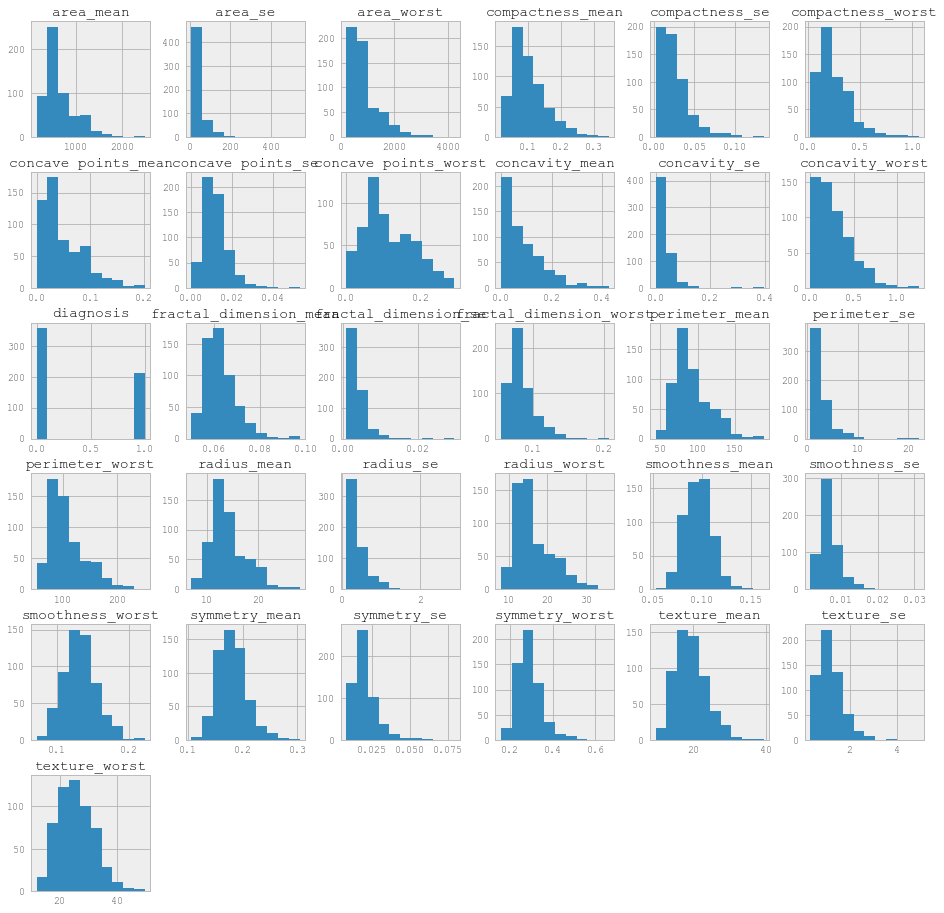

In [9]:
import matplotlib.pyplot as plt

#Display the distribution for each feature: 
pd.options.display.mpl_style = 'default'
_ = full_data.hist(figsize=(16,16))


## Feature correlation

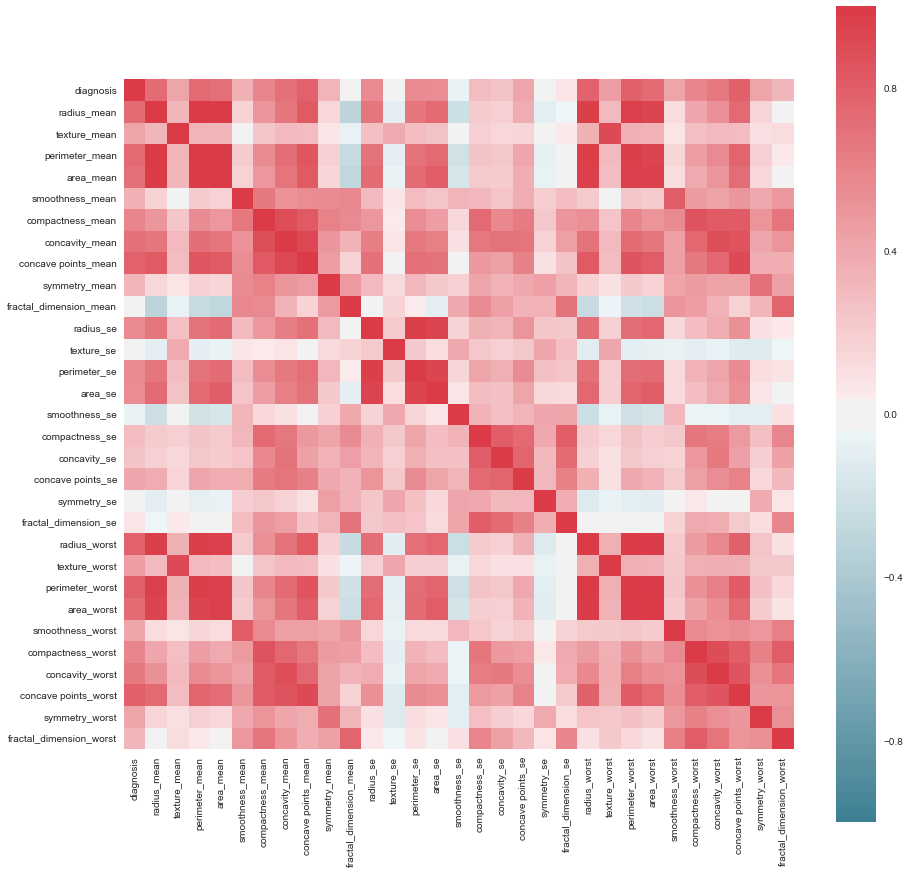

In [10]:
import seaborn as sns

#Display a feature correlation heatmap: 
f, ax = plt.subplots(figsize=(15, 15))
corr = full_data.corr()
_ = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Data Preprocessing

## Separate input features and labels

In [11]:
from sklearn.model_selection import StratifiedKFold

#Remove diagnosis from the input features:
X = full_data.drop('diagnosis', axis = 1).copy()
y = full_data['diagnosis'].copy()

display(X.head(n = 5))
display(y.head(n = 5))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Standardization (Scalling features and dealing with skewed features)

In [12]:
from sklearn.preprocessing import StandardScaler

#X_std to contain the standardized input features:
X_sf = StandardScaler().fit_transform(X.values)
X_std = pd.DataFrame(X_sf, index=X.index, columns=X.columns).copy()

display(X_std.head(n = 5))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Splitting data into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split

X = X_std
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Developing the model

## Benchmarck model

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Define and train the GaussianNB model on the training set:
gnb_bm = GaussianNB()
gnb_bm.fit(X_train, y_train)

y_pred = gnb_bm.predict(X_test)

print("Accuracy on Test set: %0.3f " % accuracy_score(y_test, y_pred))
print("Precision on Test set: %0.3f " % precision_score(y_test, y_pred))
print("Recall on Test set: %0.3f " % recall_score(y_test, y_pred))
print("Confusion Matrix - Predictions on the Test set:")
print('')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


Accuracy on Test set: 0.912 
Precision on Test set: 0.864 
Recall on Test set: 0.905 
Confusion Matrix - Predictions on the Test set:

Predicted    0   1  All
True                   
0           99   9  108
1            6  57   63
All        105  66  171


## Identify the best classifier

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

clf = SVC(random_state=0)
knn = KNeighborsClassifier()
bdt = AdaBoostClassifier(random_state=0)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=0)

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)

scores_clf = cross_val_score(clf, X_train, y_train, cv=skf, scoring='recall')
scores_knn = cross_val_score(knn, X_train, y_train, cv=skf, scoring='recall')
scores_bdt = cross_val_score(bdt, X_train, y_train, cv=skf, scoring='recall')
scores_gnb = cross_val_score(gnb, X_train, y_train, cv=skf, scoring='recall')
scores_dtc = cross_val_score(dtc, X_train, y_train, cv=skf, scoring='recall')

print("SVM Recall score: %0.3f (+/- %0.3f)" % (scores_clf.mean(), scores_clf.std() * 2))
print("KNN Recall score: %0.3f (+/- %0.3f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("BDT Recall score: %0.3f (+/- %0.3f)" % (scores_bdt.mean(), scores_bdt.std() * 2))
print("GNB Recall score: %0.3f (+/- %0.3f)" % (scores_gnb.mean(), scores_gnb.std() * 2))
print("DTC Recall score: %0.3f (+/- %0.3f)" % (scores_dtc.mean(), scores_dtc.std() * 2))

SVM Recall score: 0.960 (+/- 0.070)
KNN Recall score: 0.927 (+/- 0.148)
BDT Recall score: 0.920 (+/- 0.092)
GNB Recall score: 0.894 (+/- 0.196)
DTC Recall score: 0.914 (+/- 0.138)


## Fine-tune hyperparameters

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Set the hyperparameters to be used for the GridSearch 
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 20, 30, 100, 200, 300]},
                    {'kernel': ['linear'], 'C': [1, 10, 20, 30, 100, 200, 300]}]

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)

clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=skf, scoring='recall_macro')
clf.fit(X_train, y_train)

print("Best combination of hyperparameters found on the training set:")
print('')
print(clf.best_params_)
print('')

print("Grid scores on development set:")
print('')

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('')

#Predcitions made on the test set
y_true, y_pred = y_test, clf.predict(X_test)

print("Accuracy on Test set: %0.3f " % accuracy_score(y_true, y_pred))
print("Precision on Test set: %0.3f " % precision_score(y_true, y_pred))
print("Recall on Test set: %0.3f " % recall_score(y_true, y_pred))
print("Confusion Matrix - Predictions on Test set:")
print('')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('')

Best combination of hyperparameters found on the training set:

{'kernel': 'rbf', 'C': 100, 'gamma': 0.001}

Grid scores on development set:

0.933 (+/-0.098) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.638 (+/-0.063) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.956 (+/-0.075) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.930 (+/-0.111) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.963 (+/-0.056) for {'kernel': 'rbf', 'C': 20, 'gamma': 0.001}
0.938 (+/-0.105) for {'kernel': 'rbf', 'C': 20, 'gamma': 0.0001}
0.968 (+/-0.052) for {'kernel': 'rbf', 'C': 30, 'gamma': 0.001}
0.936 (+/-0.090) for {'kernel': 'rbf', 'C': 30, 'gamma': 0.0001}
0.971 (+/-0.042) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.956 (+/-0.075) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.964 (+/-0.048) for {'kernel': 'rbf', 'C': 200, 'gamma': 0.001}
0.963 (+/-0.056) for {'kernel': 'rbf', 'C': 200, 'gamma': 0.0001}
0.961 (+/-0.055) for {'kernel': 'rbf', 'C': 300, 'gamma': 0.001}
0.968 (+/-0.052) 

## Plotting the Confusion Matrix

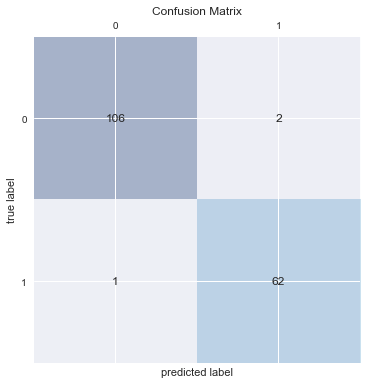

In [17]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.title('Confusion Matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()